# Forcasting Natural Gas(NG) Demand/Supply

## Abstract

Natural Gas(NG) is one of the valuable ones among the other energy resources. It is used as a heating source for homes and businesses through city gas companies and utilized as a raw material for power plants to generate electricity. Through this, it can be seen that various purposes of NG demand arise in the different fields. In addition, it is essential to identify accurate demand for NG as there is growing volatility in energy demand depending on the direction of the government's environmental policy.

This project focuses on building the model of forecasting the NG demand and supply amount of South Korea, which relies on imports for much of its energy sources. Datasets for training include various fields such as weather and prices of other energy resources, which are open-source.
Also, those are trained by using deep learning methods such as the multi-layer perceptron(MLP) with long short-term memory(LSTM), using Tensorflow. In addition, a combination of the dataset from various factors is created by using pandas for training scenario-wise, and the results are compared by changing the variables and analyzed by different viewpoints.

In [1]:
!pip3 install cloudmesh-common

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 870kB 10.5MB/s 
     |████████████████████████████████| 133kB 34.4MB/s 
  Created wheel for python-hostlist: filename=python_hostlist-1.21-cp37-none-any.whl size=38931 sha256=fffc1678b9f545997dc94696eb6bff8f68bb638fffe04d5b79bbf06da0be7038
  Stored in directory: /root/.cache/pip/wheels/0b/5b/55/ddcf52288f0b10f4564ca1b2531594ff7ccc65f487ba8dc437
Successfully built python-hostlist


In [2]:
from cloudmesh.common.StopWatch import StopWatch
from cloudmesh.common.Shell import Shell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN, InputLayer, LSTM, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

## Data Download

Reference: [Using Shell.download - cloudmesh](https://cybertraining-dsc.github.io/tutorial/cms-shell-download/#python-3-venv)

In [3]:
file_url_1 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/NaturalGas_Supply_per_Region.csv?raw=true'
file_url_2 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_korea.csv?raw=true'
file_url_3 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_seoul.csv?raw=true'
file_url_4 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_daegu.csv?raw=true'
file_url_5 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_busan.csv?raw=true'
file_url_6 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/precipitation.csv?raw=true'
file_url_7 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Pre_seoul.csv?raw=true'
file_url_8 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Pre_daegu.csv?raw=true'
file_url_9 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Pre_busan.csv?raw=true'
file_url_10 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Crude_Oil_Price.csv?raw=true'
file_url_11 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Coal_CIF_ARA.xls?raw=true'
file_url_12 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Coal_Kalimantan.xls?raw=true'
file_url_13 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Coal_Richards_Bay.xls?raw=true'
file_url_14 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/exchangerate.csv?raw=true'

destination_1 = '/content/sample_data/NaturalGas_Supply_per_Region.csv'
destination_2 = '/content/sample_data/Tem_korea.csv'
destination_3 = '/content/sample_data/Tem_seoul.csv'
destination_4 = '/content/sample_data/Tem_daegu.csv'
destination_5 = '/content/sample_data/Tem_busan.csv'
destination_6 = '/content/sample_data/precipitation.csv'
destination_7 = '/content/sample_data/Pre_seoul.csv'
destination_8 = '/content/sample_data/Pre_daegu.csv'
destination_9 = '/content/sample_data/Pre_busan.csv'
destination_10 = '/content/sample_data/Crude_Oil_Price.csv'
destination_11 = '/content/sample_data/Coal_CIF_ARA.xls'
destination_12 = '/content/sample_data/Coal_Kalimantan.xls'
destination_13 = '/content/sample_data/Coal_Richards_Bay.xls'
destination_14 = '/content/sample_data/exchangerate.csv'

Shell.download(file_url_1, destination_1, provider='system')
Shell.download(file_url_2, destination_2, provider='system')
Shell.download(file_url_3, destination_3, provider='system')
Shell.download(file_url_4, destination_4, provider='system')
Shell.download(file_url_5, destination_5, provider='system')
Shell.download(file_url_6, destination_6, provider='system')
Shell.download(file_url_7, destination_7, provider='system')
Shell.download(file_url_8, destination_8, provider='system')
Shell.download(file_url_9, destination_9, provider='system')
Shell.download(file_url_10, destination_10, provider='system')
Shell.download(file_url_11, destination_11, provider='system')
Shell.download(file_url_12, destination_12, provider='system')
Shell.download(file_url_13, destination_13, provider='system')
Shell.download(file_url_14, destination_14, provider='system')

INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget
INFO: Used wget


'/content/sample_data/exchangerate.csv'

## Data Pre-Process

### Dataset Load

Load the dataset. Each dataset includes time-based monthly data.
1. The amount of natural gas supply (nine cities seperately)
2. The temperature (one national and three regional cities)
3. The precipitation (one national and three regional cities)
4. The price of crude oil (4-types) 
5. The price of coal (3-types)
6. The exchange rate between US Dollars(USD) and South Korea Won(KRW)

In [4]:
StopWatch.start("data-load")
## Natural gas dataset
ng_sup_df = pd.read_csv('sample_data/NaturalGas_Supply_per_Region.csv')
#ng_pro_df = pd.read_csv('sample_data/NaturalGas_Production.csv', encoding='CP949')

## Monthly average temperature dataset
tem_total = pd.read_csv('sample_data/Tem_korea.csv', encoding='CP949')
tem_df1 = pd.read_csv('sample_data/Tem_seoul.csv', encoding='CP949')
#tem_df2 = pd.read_csv('sample_data/Tem_Incheon.csv', encoding='CP949')
#tem_df3 = pd.read_csv('sample_data/Tem_suwon_kyunggi.csv', encoding='CP949')
#tem_df4 = pd.read_csv('sample_data/Tem_wonju_gangwon.csv', encoding='CP949')
#tem_df5 = pd.read_csv('sample_data/Tem_daejeon.csv', encoding='CP949')
#tem_df6 = pd.read_csv('sample_data/Tem_gunsan_jeonbuk.csv', encoding='CP949')
#tem_df7 = pd.read_csv('sample_data/Tem_gwangju.csv', encoding='CP949')
tem_df8 = pd.read_csv('sample_data/Tem_daegu.csv', encoding='CP949')
tem_df9 = pd.read_csv('sample_data/Tem_busan.csv', encoding='CP949')

## Monthly avarage precipation dataset
pre_total = pd.read_csv('sample_data/precipitation.csv', encoding='CP949')
pre_df1 = pd.read_csv('sample_data/Pre_seoul.csv', encoding='CP949')
#pre_df2 = pd.read_csv('sample_data/Pre_incheon.csv', encoding='CP949')
#pre_df3 = pd.read_csv('sample_data/Pre_suwon_kyunggi.csv', encoding='CP949')
#pre_df4 = pd.read_csv('sample_data/Pre_wonju_gangwon.csv', encoding='CP949')
#pre_df5 = pd.read_csv('sample_data/Pre_daejeon.csv', encoding='CP949')
#pre_df6 = pd.read_csv('sample_data/Pre_gunsan_jeonbuk.csv', encoding='CP949')
#pre_df7 = pd.read_csv('sample_data/Pre_gwangju.csv', encoding='CP949')
pre_df8 = pd.read_csv('sample_data/Pre_daegu.csv', encoding='CP949')
pre_df9 = pd.read_csv('sample_data/Pre_busan.csv', encoding='CP949')

## Crude oil price dataset
oil_df = pd.read_csv('sample_data/Crude_Oil_Price.csv')

## Coal price dataset
coal_df1 = pd.read_excel('sample_data/Coal_CIF_ARA.xls')
coal_df2  = pd.read_excel('sample_data/Coal_Kalimantan.xls')
coal_df3 = pd.read_excel('sample_data/Coal_Richards_Bay.xls')

## Exchange rate dataset
ex_df1 = pd.read_csv('sample_data/exchangerate.csv', encoding='CP949')
StopWatch.stop("data-load")

### Data preprocess_1

Preprocess data using pandas and create objective dataset.


In [5]:
StopWatch.start("data-preprocess_1")
## Change column names to lowercase
df_names = [ng_sup_df, oil_df, coal_df1, coal_df2, coal_df3]
for name in df_names:
  name.columns = name.columns.str.lower()

## Split natural gas dataset
total_ng_df = ng_sup_df.iloc[:,2:]

## Consolidate temperature dataset
tem_df = pd.concat([tem_df1['avg_tem'],
                    tem_df8['avg_tem'],
                    tem_df9['avg_tem']],axis=1)
tem_df.columns = ['avg_tem_seoul',
                  'avg_tem_daegu',
                  'avg_tem_busan']

## Consolidate precipitation dataset
pre_df = pd.concat([pre_df1['avg_precipitation'],
                    pre_df8['avg_precipitation'],
                    pre_df9['avg_precipitation']],axis=1)
pre_df.columns = ['avg_pre_seoul',
                  'avg_pre_daegu',
                  'avg_pre_busan']

## Consolidate coal price dataset
coal_df = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
coal_df.columns = ['coal_price_ca', 'coal_price_ka', 'coal_price_rb']

## Change exchange rate dataset shape
ex_df = ex_df1.transpose()
ex_df.columns = ['rate']
ex_df.index = list(range(48))

## Build objective dataset
df_total = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul'], 
                      pre_df['avg_pre_seoul'],
                      oil_df[['dubai','brent','wti','oman']],
                      coal_df, ex_df['rate']], axis=1) 
df_total = df_total.iloc[:-1,:]
StopWatch.stop("data-preprocess_1")

In [7]:
df_total.head()

,seoul,avg_tem_seoul,avg_pre_seoul,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,1110948.0,-3.2,53.0,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,911323.0,0.2,52.0,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,718859.0,7.0,51.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,417299.0,14.1,55.0,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,354428.0,19.6,56.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


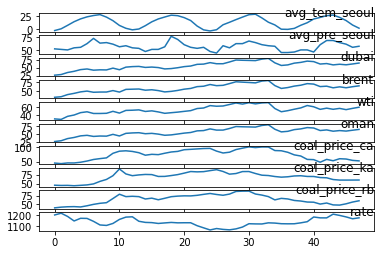

In [8]:
## Plot each column data
fig = plt.figure()
for i in range(1,df_total.shape[-1]):
  ax = fig.add_subplot(df_total.shape[-1]-1,1,i)
  ax.plot(df_total.iloc[:,i])
  ax.set_title(df_total.columns[i], y=0.5, loc='right')
plt.show()

In [9]:
## Make function which can convert normalized dataset to supervised dataset
def convert_dataset(dataset, num_i, num_o, dropnan=True):
  columns = []
  col_names = []
  conv_df = pd.DataFrame(dataset)
  for i in range(num_i, 0, -1):
    columns.append(conv_df.shift(periods=i))
    for j in range(dataset.shape[-1]):
      col_names.append('column{}(t-{})'.format(j+1,i))
  for i in range(num_o):
    columns.append(conv_df.shift(periods=-i))
    if i == 0:
      for j in range(dataset.shape[-1]):
        col_names.append('column{}(t)'.format(j+1))
    else:
      for j in range(dataset.shape[-1]):
        col_names.append('column{}(t+{})'.format(j+1, i))

  new_df = pd.concat(columns, axis=1)
  new_df.columns = col_names
  if dropnan:
    new_df.dropna(inplace=True)
  return new_df

In [10]:
## Make function which can make train and test dataset 
def processed_dataset(dataset_norm, time_interval, boundary):
  new_df = convert_dataset(dataset_norm, time_interval, 1)
  new_df.drop(new_df.columns[list(range(dataset_norm.shape[-1]+1, 2*dataset_norm.shape[-1]))], axis=1, inplace=True)

  train = new_df.values[:boundary, :]
  test = new_df.values[boundary:,:]

  x_train, y_train = train[:, :-1], train[:, -1]
  x_test, y_test = test[:, :-1], test[:,-1]

  x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[-1])
  x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[-1])

  return x_train, y_train, x_test, y_test

In [11]:
## Make function which can build the network model
def define_model(x_train, dropout, learning_rate):
  model = Sequential()
  ## LSTM Layers
  model.add(LSTM(100, input_shape = (x_train.shape[1], x_train.shape[2]),
                 return_sequences=True))
  model.add(LSTM(100, dropout=dropout,
                 return_sequences=False))

  ## MLP Layers
  model.add(Dense(100))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(100))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1))
  model.add(Activation('relu'))

  opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mae', optimizer=opt)
  model.summary()

  return model

In [12]:
## Make function which can train model
def train_model(model, x_train, y_train, x_test, y_test, epoch):
  history = model.fit(x_train, y_train, 
                    epochs=epoch, 
                    validation_data=(x_test, y_test))
  return history

In [13]:
## Make function which can plot loss
def loss_plot(history):
  k = list(range(1, len(history.history['loss'])+1))
  plt.plot(k, history.history['loss'], label='Train Loss')
  plt.plot(k, history.history['val_loss'], label='Validation Loss')
  plt.ylabel('Mean Absolute Error')
  plt.xlabel('Epoch')
  plt.legend()

  return plt.show()

In [14]:
## Make function which can convert dataset to original shape
def predicted_model(model, x_test, y_test, scaler):
  y_predicted = model.predict(x_test)
  x_test = x_test.reshape(x_test.shape[0], x_test.shape[2])
  x_te_re = x_test[:,1:]
  y_test = y_test.reshape(len(y_test), 1)

  inv_y_predicted = np.concatenate((y_predicted, x_te_re), axis=1)
  inv_y_predicted = scaler.inverse_transform(inv_y_predicted)[:,0]

  inv_y = np.concatenate((y_test, x_te_re), axis=1)
  inv_y = scaler.inverse_transform(inv_y)[:,0]

  rmse = np.sqrt(metrics.mean_squared_error(inv_y, inv_y_predicted))
  print('The RMSE is: %.4f' % rmse)

  plt.plot(inv_y, label='Real')
  plt.plot(inv_y_predicted, label='Prediction')
  plt.legend()
  
  return plt.show()

In [15]:
## Make function which can convert dataset to original shape(with timesteps)
def predicted_time_model(model, x_test, y_test, scaler, time, feature):
  y_predicted = model.predict(x_test)
  x_test = x_test.reshape(x_test.shape[0], (time*feature))
  x_te_re = x_test[:,-(feature-1):]
  y_test = y_test.reshape(len(y_test), 1)

  inv_y_predicted = np.concatenate((y_predicted, x_te_re), axis=1)
  inv_y_predicted = scaler.inverse_transform(inv_y_predicted)[:,0]

  inv_y = np.concatenate((y_test, x_te_re), axis=1)
  inv_y = scaler.inverse_transform(inv_y)[:,0]

  rmse = np.sqrt(metrics.mean_squared_error(inv_y, inv_y_predicted))
  print('The RMSE is : %.4f' % rmse)

  plt.plot(inv_y, label='Real')
  plt.plot(inv_y_predicted, label='Prediction')
  plt.legend()
  
  return plt.show()

### Data preprocess_2

Min-Max scaling

In this project, all datasets are rescaled between 0 and 1 by Min-Max scaling, one of the most common normalization methods. If there is a feature with anonymous data, The maximum value(max(x)) of data is converted to 1, and the minimum value(min(x)) of data is converted to 0. The other values between the maximum value and the minimum value get converted to x', between 0 and 1.
$$x' = \frac{x-min(x)}{max(x)-min(x)}$$

Reference: [How to use MinMaxScaler](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

Reference: [How to process time series dataset](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)

Reference: [How to process multivariate time series dataset](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/)

In [16]:
StopWatch.start("data-preprocess_2")
scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(df_total)
x_train, y_train, x_test, y_test = processed_dataset(dataset_norm, 1, 12)
StopWatch.stop("data-preprocess_2")

## Define Model

For forecasting the NG supply amount from the time series dataset, MLP with LSTM network model is designed by using Tensorflow. The first and second LSTM layers have 100 units, and a total of 3 layers of MLP follow it. Each MLP layer has 100 neurons instead of the final layer, where its neuron is 1. In addition, dropout was designated to prevent overfitting of data, the Adam is used as an optimizer, and the Rectified Linear Unit(ReLU) as an activation function.

Reference: [Introduction to MAE and RMSE](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

Reference: [MLP + LSTM with Tensorflow](https://cybertraining-dsc.github.io/modules/ai-first/2021/google_colab_mlp_lstm/)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            44800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0

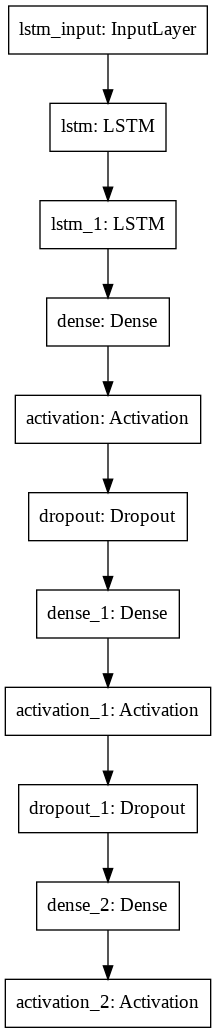

In [17]:
StopWatch.start("compile")
model = define_model(x_train, 0.1, 0.0005)
StopWatch.stop("compile")
tf.keras.utils.plot_model(model)

## Train

Train the dataset.

In [18]:
StopWatch.start("train")
history = train_model(model, x_train, y_train, x_test, y_test, 100)
StopWatch.stop("train")

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2666 - val_loss: 0.3747
Epoch 2/100
1/1 [==============================] - 0s 94ms/step - loss: 0.2617 - val_loss: 0.3664
Epoch 3/100
1/1 [==============================] - 0s 95ms/step - loss: 0.2586 - val_loss: 0.3583
Epoch 4/100
1/1 [==============================] - 0s 92ms/step - loss: 0.2550 - val_loss: 0.3498
Epoch 5/100
1/1 [==============================] - 0s 90ms/step - loss: 0.2497 - val_loss: 0.3409
Epoch 6/100
1/1 [==============================] - 0s 112ms/step - loss: 0.2447 - val_loss: 0.3317
Epoch 7/100
1/1 [==============================] - 0s 107ms/step - loss: 0.2440 - val_loss: 0.3226
Epoch 8/100
1/1 [==============================] - 0s 103ms/step - loss: 0.2350 - val_loss: 0.3132
Epoch 9/100
1/1 [==============================] - 0s 100ms/step - loss: 0.2356 - val_loss: 0.3044
Epoch 10/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2366 - val_loss: 0.2971
Epoch 11/100
1/1

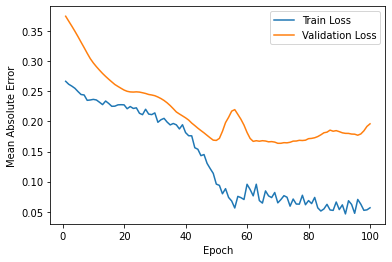

In [19]:
loss_plot(history)

Evaluation 

Mean Absolute Error(MAE) and Root Mean Squared Error(RMSE) are applied for this time series dataset to evaluate this network model. The MAE measures the average magnitude of the errors and is presented by the formula as following, where $n$ is the number of errors, $y_i$ is the $i^th$ true value, and $\hat{y_i}$ is the $i^th$ predicted value.
$$MAE = \frac{\Sigma_{i=1}^n|y_i-\hat{y_i}|}{n}$$
Also, The RMSE is used for observing the differences between the real dataset and prediction values. The following is the formula of RMSE, and each value of this is same for MAE.
$$RMSE = \sqrt{\frac{\Sigma_{i=1}^n(y_i-\hat{y_i})^2}{n}}$$

## Predict

Since the datasets used for the training are normalized between 0 and 1, they get converted again to a range of the ground truth values. From these rescaled datasets, it is possible to obtain the RMSE and compare the differences between a actual value and a predicted value.

The RMSE is: 227017.8431


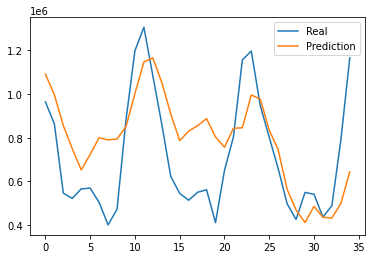

In [20]:
StopWatch.start("predict")
predicted_model(model, x_test, y_test, scaler)
StopWatch.stop("predict")

Reference: [StopWatch and Benchmark](https://cybertraining-dsc.github.io/modules/python/google-colab/python-google-colab/)

In [21]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

## Test1 - Climate dataset

In this test, the climate dataset is used to build a model. The dataset includes temperature data and precipitation data.

In [32]:
StopWatch.start("test1-data-preprocess_1")
df_total_ver_2 = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul'], 
                      pre_df['avg_pre_seoul']], axis=1) 
StopWatch.stop("test1-data-preprocess_1")
df_total_ver_2.head()

,seoul,avg_tem_seoul,avg_pre_seoul
0,1110948,-3.2,53
1,911323,0.2,52
2,718859,7.0,51
3,417299,14.1,55
4,354428,19.6,56


In [33]:
StopWatch.start("test1-data-preprocess_2")
scaler2 = MinMaxScaler()
dataset_norm2 = scaler2.fit_transform(df_total_ver_2)
x_train2, y_train2, x_test2, y_test2 = processed_dataset(dataset_norm2, 1, 12)
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape
StopWatch.stop("test1-data-preprocess_2")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 100)            41600     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_10 (Activation)   (None, 100)              

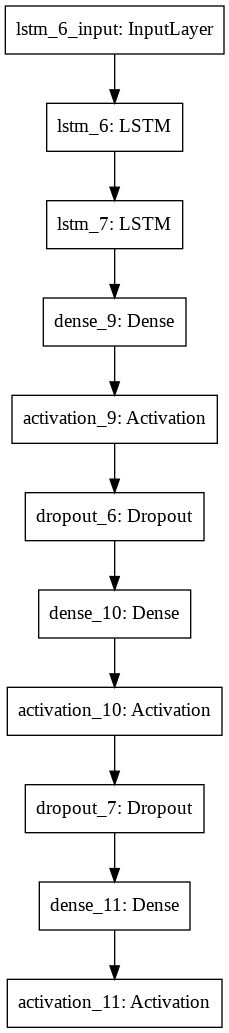

In [34]:
StopWatch.start("test2-compile")
model2 = define_model(x_train2, 0.1, 0.0005)
StopWatch.stop("test2-compile")
tf.keras.utils.plot_model(model2)

In [35]:
StopWatch.start("test1-train")
history2 = train_model(model2, x_train2, y_train2, x_test2, y_test2, 100)
StopWatch.stop("test1-train")

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2679 - val_loss: 0.3820
Epoch 2/100
1/1 [==============================] - 0s 87ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 0.2678 - val_loss: 0.3801
Epoch 4/100
1/1 [==============================] - 0s 81ms/step - loss: 0.2668 - val_loss: 0.3760
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 0.2634 - val_loss: 0.3715
Epoch 6/100
1/1 [==============================] - 0s 96ms/step - loss: 0.2606 - val_loss: 0.3671
Epoch 7/100
1/1 [==============================] - 0s 84ms/step - loss: 0.2588 - val_loss: 0.3627
Epoch 8/100
1/1 [==============================] - 0s 110ms/step - loss: 0.2571 - val_loss: 0.3582
Epoch 9/100
1/1 [==============================] - 0s 96ms/step - loss: 0.2536 - val_loss: 0.3533
Epoch 10/100
1/1 [==============================] - 0s 83ms/step - loss: 0.2515 - val_loss: 0.3482
Epoch 11/100
1/1 [==

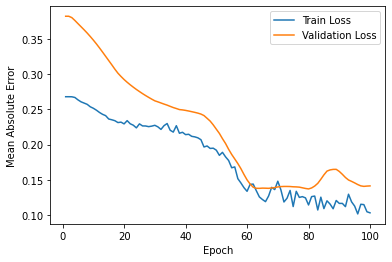

In [36]:
loss_plot(history2)

The RMSE is: 185204.7026


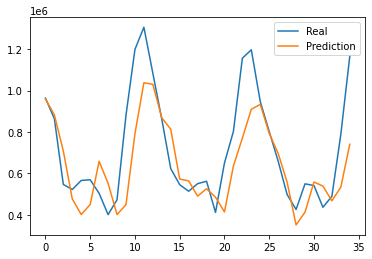

In [37]:
StopWatch.start("test1-predict")
predicted_model(model2, x_test2, y_test2, scaler2)
StopWatch.stop("test1-predict")

## Test2 - Temperature dataset

In this test, only a temperature dataset is used to build a model. The values of this dataset show that it is low in winter and high in summer.

In [41]:
StopWatch.start("test2-data-preprocess_1")
df_total_ver_3 = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul']], axis=1)
StopWatch.stop("test2-data-preprocess_1")
df_total_ver_3.head()

,seoul,avg_tem_seoul
0,1110948,-3.2
1,911323,0.2
2,718859,7.0
3,417299,14.1
4,354428,19.6


In [42]:
StopWatch.start("test2-data-preprocess_2")
scaler3 = MinMaxScaler()
dataset_norm3 = scaler3.fit_transform(df_total_ver_3)
x_train3, y_train3, x_test3, y_test3 = processed_dataset(dataset_norm3, 1, 12)
StopWatch.stop("test2-data-preprocess_2")
x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape

((12, 1, 2), (12,), (35, 1, 2), (35,))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1, 100)            41200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_15 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_16 (Activation)   (None, 100)              

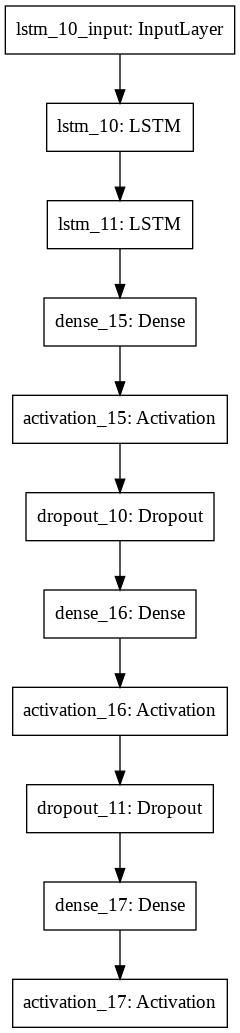

In [43]:
StopWatch.start("test2-compile")
model3 = define_model(x_train3, 0.1, 0.0005)
StopWatch.stop("test2-compile")
tf.keras.utils.plot_model(model3)

In [44]:
StopWatch.start("test2-train")
history3 = train_model(model3, x_train3, y_train3, x_test3, y_test3, 100)
StopWatch.stop("test2-train")

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2677 - val_loss: 0.3768
Epoch 2/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2641 - val_loss: 0.3712
Epoch 3/100
1/1 [==============================] - 0s 87ms/step - loss: 0.2609 - val_loss: 0.3661
Epoch 4/100
1/1 [==============================] - 0s 80ms/step - loss: 0.2584 - val_loss: 0.3608
Epoch 5/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2549 - val_loss: 0.3553
Epoch 6/100
1/1 [==============================] - 0s 90ms/step - loss: 0.2527 - val_loss: 0.3494
Epoch 7/100
1/1 [==============================] - 0s 97ms/step - loss: 0.2506 - val_loss: 0.3432
Epoch 8/100
1/1 [==============================] - 0s 96ms/step - loss: 0.2471 - val_loss: 0.3366
Epoch 9/100
1/1 [==============================] - 0s 110ms/step - loss: 0.2435 - val_loss: 0.3297
Epoch 10/100
1/1 [==============================] - 0s 109ms/step - loss: 0.2398 - val_loss: 0.3228
Epoch 11/100
1/1 [=

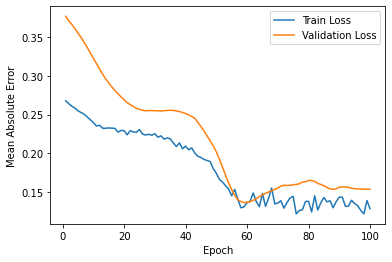

In [45]:
loss_plot(history3)

The RMSE is: 207585.1521


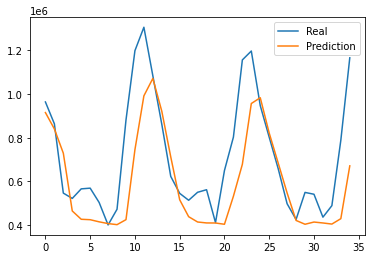

In [46]:
StopWatch.start("test2-predict")
predicted_model(model3, x_test3, y_test3, scaler3)
StopWatch.stop("test2-predict")

## Test3 - Applying timesteps

In this test, all dataset are used to build a model. The dataset is same to the first implementation, but timesteps are applied.

In [47]:
StopWatch.start("test3-data-preprocess_1")
df_total_ver_4 = df_total.copy()
StopWatch.stop("test3-data-preprocess_1")
df_total_ver_4.head()

,seoul,avg_tem_seoul,avg_pre_seoul,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,1110948.0,-3.2,53.0,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,911323.0,0.2,52.0,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,718859.0,7.0,51.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,417299.0,14.1,55.0,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,354428.0,19.6,56.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


In [48]:
StopWatch.start("test3-data-preprocess_2")
scaler4 = MinMaxScaler()
dataset_norm4 = scaler4.fit_transform(df_total_ver_4)

months = 2
features = 11
n = months*features

new_df = convert_dataset(dataset_norm4, months, 1)
values = new_df.values
train4 = values[:12, :]
test4 = values[12:,:]

x_train4, y_train4 = train4[:, :n], train4[:, -features]
x_test4, y_test4 = test4[:, :n], test4[:,-features]

x_train4 = x_train4.reshape(x_train4.shape[0], months, features)
x_test4 = x_test4.reshape(x_test4.shape[0], months, features)
StopWatch.stop("test3-data-preprocess_2")
x_train4.shape, y_train4.shape, x_test4.shape, y_test4.shape

((12, 2, 11), (12,), (34, 2, 11), (34,))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 2, 100)            44800     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_21 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_22 (Activation)   (None, 100)              

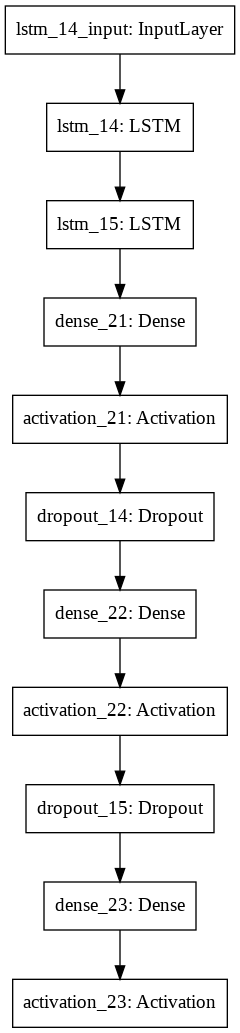

In [50]:
StopWatch.start("test3-compile")
model4 = define_model(x_train4, 0.1, 0.0005)
StopWatch.stop("test3-compile")
tf.keras.utils.plot_model(model4)

In [51]:
StopWatch.start("test3-train")
history4 = train_model(model4, x_train4, y_train4, x_test4, y_test4, 100)
StopWatch.stop("test3-train")

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.2645 - val_loss: 0.3351
Epoch 2/100
1/1 [==============================] - 0s 92ms/step - loss: 0.2549 - val_loss: 0.3173
Epoch 3/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2466 - val_loss: 0.3009
Epoch 4/100
1/1 [==============================] - 0s 97ms/step - loss: 0.2388 - val_loss: 0.2860
Epoch 5/100
1/1 [==============================] - 0s 91ms/step - loss: 0.2324 - val_loss: 0.2716
Epoch 6/100
1/1 [==============================] - 0s 113ms/step - loss: 0.2287 - val_loss: 0.2590
Epoch 7/100
1/1 [==============================] - 0s 105ms/step - loss: 0.2241 - val_loss: 0.2468
Epoch 8/100
1/1 [==============================] - 0s 97ms/step - loss: 0.2196 - val_loss: 0.2354
Epoch 9/100
1/1 [==============================] - 0s 107ms/step - loss: 0.2201 - val_loss: 0.2270
Epoch 10/100
1/1 [==============================] - 0s 95ms/step - loss: 0.2227 - val_loss: 0.2217
Epoch 11/100
1/1 

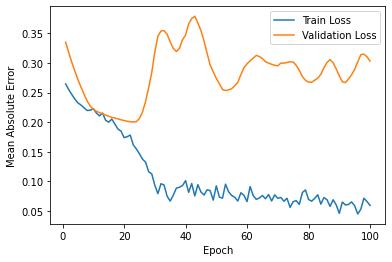

In [52]:
loss_plot(history4)

The RMSE is : 340842.9452


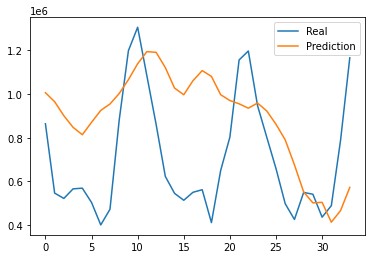

In [53]:
StopWatch.start("test3-predict")
predicted_time_model(model4, x_test4, y_test4, scaler4, months, features)
StopWatch.stop("test3-predict")

## Test4 - National dataset

In [54]:
StopWatch.start("test4-data-preprocess_1")
df_total_country = pd.concat([ng_sup_df.sum(axis=1), tem_total['avg_tem'], 
                              pre_total['avg_precipitation'], 
                              oil_df[['dubai','brent','wti','oman']],
                              coal_df, ex_df['rate']], axis=1) 
df_total_country = df_total_country.iloc[:-1,:]
df_total_country = df_total_country.rename(columns = {0:'total'})
StopWatch.stop("test4-data-preprocess_1")
df_total_country.head()

,total,avg_tem,avg_precipitation,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,4250103.0,2.8,26.3,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,3559794.0,8.8,58.2,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,3182961.0,15.8,169.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,2125051.0,21.8,221.2,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,1978337.0,26.2,140.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


In [55]:
StopWatch.start("test4-data-preprocess_2")
scaler5 = MinMaxScaler()
dataset_norm5 = scaler5.fit_transform(df_total_country)
x_train5, y_train5, x_test5, y_test5 = processed_dataset(dataset_norm5, 1, 12)
StopWatch.stop("test4-data-preprocess_2")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 1, 100)            44800     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_27 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_28 (Activation)   (None, 100)              

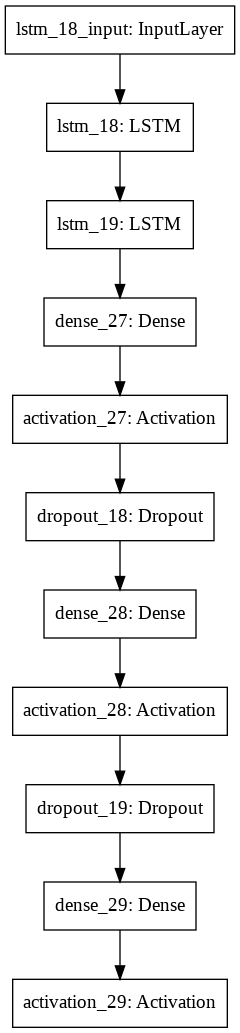

In [57]:
StopWatch.start("test4-compile")
model5 = define_model(x_train5, 0.1, 0.0005)
StopWatch.stop("test4-compile")
tf.keras.utils.plot_model(model5)

In [58]:
StopWatch.start("test4-train")
history5 = train_model(model5, x_train5, y_train5, x_test5, y_test5, 100)
StopWatch.stop("test4-train")

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2538 - val_loss: 0.3711
Epoch 2/100
1/1 [==============================] - 0s 81ms/step - loss: 0.2524 - val_loss: 0.3655
Epoch 3/100
1/1 [==============================] - 0s 87ms/step - loss: 0.2481 - val_loss: 0.3595
Epoch 4/100
1/1 [==============================] - 0s 89ms/step - loss: 0.2427 - val_loss: 0.3534
Epoch 5/100
1/1 [==============================] - 0s 99ms/step - loss: 0.2390 - val_loss: 0.3472
Epoch 6/100
1/1 [==============================] - 0s 106ms/step - loss: 0.2351 - val_loss: 0.3412
Epoch 7/100
1/1 [==============================] - 0s 89ms/step - loss: 0.2302 - val_loss: 0.3349
Epoch 8/100
1/1 [==============================] - 0s 90ms/step - loss: 0.2281 - val_loss: 0.3283
Epoch 9/100
1/1 [==============================] - 0s 93ms/step - loss: 0.2248 - val_loss: 0.3217
Epoch 10/100
1/1 [==============================] - 0s 110ms/step - loss: 0.2180 - val_loss: 0.3155
Epoch 11/100
1/1 [=

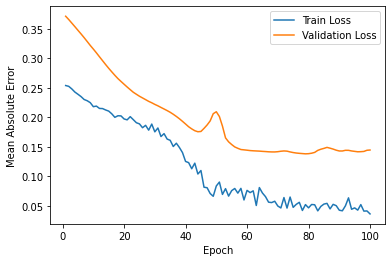

In [59]:
loss_plot(history5)

The RMSE is: 587340.7243


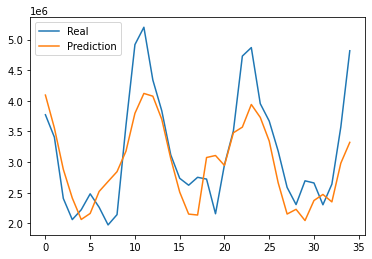

In [60]:
StopWatch.start("test4-predict")
predicted_model(model5, x_test5, y_test5, scaler5)
StopWatch.stop("test4-predict")

## Benchmarks

For a benchmark, the Cloudmesh StopWatch and Benchmark are used to measure the program's performance. The time spent on data load, data preprocessing, network model compile, training, and prediction was separately measured, and the overall time for execution of all scenarios is around 77 seconds. It can be seen that The training time for the fourth scenario is the longest and the one for the fifth scenario is the shortest.

In [171]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

In [66]:
def predicted_model(model, x_test, y_test, scaler):
  y_predicted = model.predict(x_test)
  x_test = x_test.reshape(x_test.shape[0], x_test.shape[2])
  x_te_re = x_test[:,1:]
  y_test = y_test.reshape(len(y_test), 1)

  inv_y_predicted = np.concatenate((y_predicted, x_te_re), axis=1)
  inv_y_predicted = scaler.inverse_transform(inv_y_predicted)[:,0]

  inv_y = np.concatenate((y_test, x_te_re), axis=1)
  inv_y = scaler.inverse_transform(inv_y)[:,0]

  rmse = np.sqrt(metrics.mean_squared_error(inv_y, inv_y_predicted))
  #print('The RMSE is: %.4f' % rmse)

  plt.plot(inv_y, label='Real')
  plt.plot(inv_y_predicted, label='Prediction')
  plt.legend()

In [69]:
def predicted_time_model(model, x_test, y_test, scaler, time, feature):
  y_predicted = model.predict(x_test)
  x_test = x_test.reshape(x_test.shape[0], (time*feature))
  x_te_re = x_test[:,-(feature-1):]
  y_test = y_test.reshape(len(y_test), 1)

  inv_y_predicted = np.concatenate((y_predicted, x_te_re), axis=1)
  inv_y_predicted = scaler.inverse_transform(inv_y_predicted)[:,0]

  inv_y = np.concatenate((y_test, x_te_re), axis=1)
  inv_y = scaler.inverse_transform(inv_y)[:,0]

  rmse = np.sqrt(metrics.mean_squared_error(inv_y, inv_y_predicted))
  #print('The RMSE is : %.4f' % rmse)

  plt.plot(inv_y, label='Real')
  plt.plot(inv_y_predicted, label='Prediction')
  plt.legend()

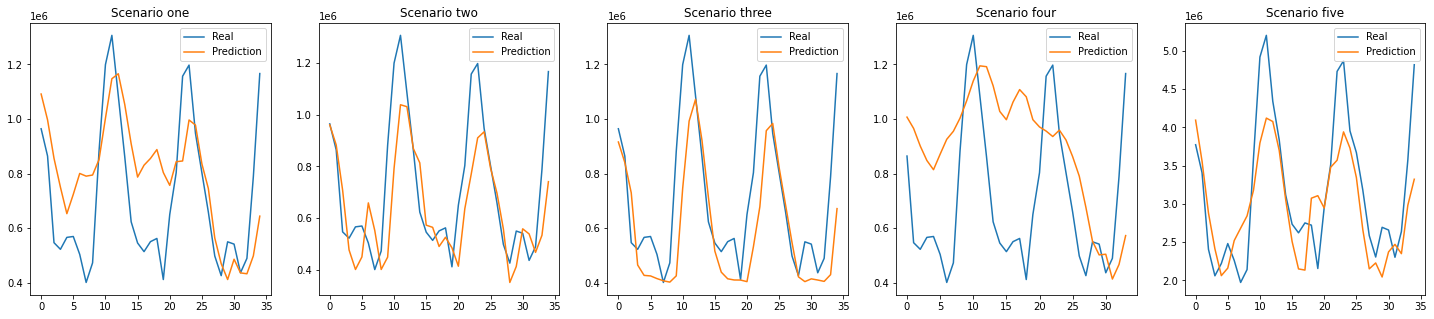

In [71]:
fig = plt.figure(figsize=(25,5))
plt.subplot(151)
plt.title('Scenario one')
predicted_model(model, x_test, y_test, scaler)
plt.subplot(152)
plt.title('Scenario two')
predicted_model(model2, x_test2, y_test2, scaler2)
plt.subplot(153)
plt.title('Scenario three')
predicted_model(model3, x_test3, y_test3, scaler3)
plt.subplot(154)
plt.title('Scenario four')
predicted_time_model(model4, x_test4, y_test4, scaler4, months, features)
plt.subplot(155)
plt.title('Scenario five')
predicted_model(model5, x_test5, y_test5, scaler5)

## Compared results

Out of the five scenarios in total, the second and third have smaller RMSE than others, and the graphs also show relatively similar results. The first and fourth show differences in the beginning and similar trends in the last part. However, it is noteworthy that the gap at the beginning of them is very large, but it tends to shrink together at the point of decline and stretch together at the point of increase.

In the first and fifth scenarios, all data are identical except that they differ in regional scale in temperature and precipitation. It is also the same that 12 months of data are used as the training set. From the subtle differences in the shape of the resulting graph, it can be seen that the national average data cannot represent the situation in a particular region, and the amount of NG supply differs depending on the circumstances in the region.

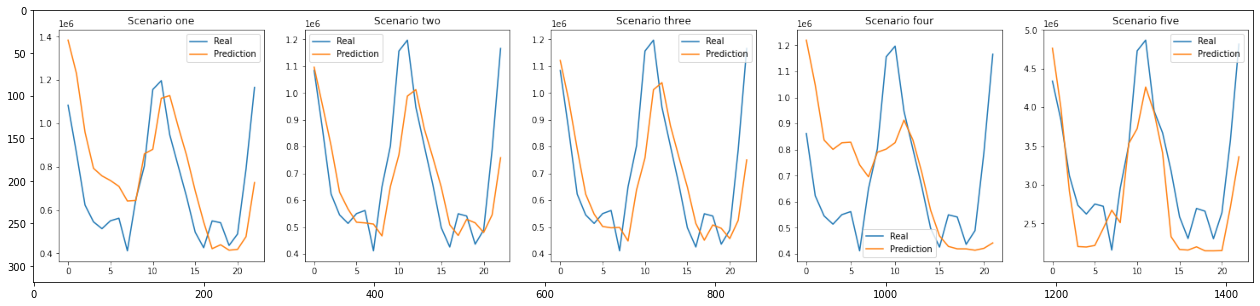

In [9]:
from PIL import Image
img = Image.open("sample_data/compared_prediction_2.png")
plt.figure(figsize=(25,5))
plt.imshow(img)
plt.show()

After changing the training set from twelve months to twenty-four months, the results are more clearly visible. The second and third prediction graphs have a more similar shape and the RMSE value decreases than the previous setting. The results of other scenarios show that the overall shape has improved; contrarily, the shape of the rapidly changing middle part is better in the previous condition.

## Conclusion

From the results of this project, it can be seen that simplifying factors that have a significant impact shows better efficiency than combining various factors. For example, NG consumption tends to increase for heating in the cold weather. In addition, there is a lot of precipitation in the warm or hot weather, on the contrary, there is relatively little precipitation in the cold weather. It can be seen that these seasonal elements show relatively high consistency for affecting prediction when those are used as training datasets. Also, the predictions are derived more effectively when the seasonal datasets are combined.

However, in training set with 12 months duration, the last part of the scenario used the dataset combined with various factors, which seem to be not related to season, tends to match real data. Furthemore, when the training set is doubled on the same dataset, it can be seen that the differences between real and prediction graph is decreased than the result of smaller traing set. Based on this, it can be expected that the results could vary if a large amount of dataset with a longer period is used and the ratio of the training set is appropriately adjusted.

South Korea imports a large amount of its energy resources. Also, the plan for energy supply and demand is being made and operated through nation-led policies. Ironically, the government's plan also shows a sharp change in direction with recent environmental issues, and the volatility of demand in the energy market is greater than before. Therefore, methodologies for accurate forecasting of energy demand will need to be complemented and developed constantly to prepare for and overcome this variability.

In this project, Forecasting NG demand and supply was carried out using various data factors such as weather and price that is relatively easily obtained than the datasets which are complex economic indicators or classified as confidential. Nevertheless, state-of-the-art deep learning methods show that it has the flexibility and potential to forecast NG demand through the tendency of the results that indicate a relativaly consistent with the actual data. From this point of view, it is thought that the research on NG in South Korea should be conducted in an advanced form by utilizing various data and more specialized analysis.